# Day 29 Analysis

Today's analysis will be a revisit of my previous comparison between Geno Smith, Joe Burrow, and other QBs with at least 15 passing attempts in a game. Is Geno Smith still leading the league in Completion Percentage? Is Joe Burrow still beating him in the stats that matter?

I also wanted to update my chart with nicer formatting that matches what I made yesterday.

## Set Up

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Create database connection
conn = sqlite3.connect('../../data/db/database.db')

## Get the data
2022 QB performances with at least 15 attempts

In [2]:
query = """
SELECT
    player_id,
    player_display_name AS player_name,
    week,
    completions,
    attempts,
    ROUND(((completions*1.0 / attempts) * 100), 2) AS comp_pct,
    passing_yards AS pass_yds,
    passing_tds AS pass_tds,
    interceptions AS int,
    passing_air_yards AS pass_air_yds,
    ROUND(fantasy_points,2) AS pts,
    COUNT() OVER(PARTITION BY player_name) AS games_played
FROM weekly 
WHERE season = 2022
    AND week <= 11
    AND position = 'QB'
    AND season_type = 'REG'
    AND attempts >= 15
"""

df_2022 = pd.read_sql(query, conn)

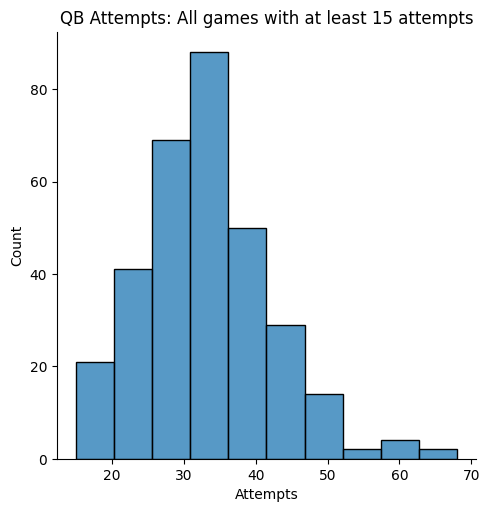

In [3]:
g = sns.displot(
    x="attempts",
    data=df_2022,
    kind="hist",
    bins=10
)

g.set(
    title="QB Attempts: All games with at least 15 attempts",
    xlabel="Attempts"
)

In [4]:
df_2022.describe().round(2)

,week,completions,attempts,comp_pct,pass_yds,pass_tds,int,pass_air_yds,pts,games_played
count,320.00,320.00,320.00,320.00,320.00,320.00,320.00,320.00,320.00,320.00
mean,5.79,21.45,33.16,64.75,235.54,1.37,0.69,252.52,16.16,8.44
std,3.17,6.30,8.96,9.17,71.35,1.09,0.84,88.42,7.67,2.31
min,1.00,5.00,15.00,31.25,60.00,0.00,0.00,-1.00,0.88,1.00
25%,3.00,17.00,27.00,59.26,190.00,1.00,0.00,187.00,10.70,7.00
50%,6.00,21.00,33.00,64.52,234.00,1.00,0.00,243.50,15.66,10.00
75%,8.25,25.00,38.00,71.14,277.25,2.00,1.00,304.25,19.65,10.00
max,11.00,43.00,68.00,90.91,481.00,6.00,4.00,534.00,42.72,11.00


## Top QBs by Completion Percentage

In [7]:
# Order QBs by completion percentage for only those who have played every possible game through Week 11
# Players with only 10 games had a Bye Week
by_player_2022 = df_2022\
    .groupby('player_name')\
    .mean()\
    .sort_values(['games_played', 'comp_pct'], ascending=[False, False])\
    .round(2)

by_player_2022[by_player_2022['games_played'] >= 10]

/var/folders/pr/phs5jp1d143fx1t05hqzwt580000gn/T/ipykernel_96284/3783606312.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()\


,week,completions,attempts,comp_pct,pass_yds,pass_tds,int,pass_air_yds,pts,games_played
player_name,,,,,,,,,,
Aaron Rodgers,6.0,22.09,34.18,65.40,231.09,1.73,0.64,268.91,14.92,11.0
Geno Smith,5.5,23.00,31.60,72.80,247.40,1.70,0.40,237.50,18.28,10.0
Joe Burrow,5.6,25.70,37.20,69.41,289.00,2.20,0.80,252.50,22.62,10.0
Jalen Hurts,5.9,19.80,29.00,68.22,240.70,1.50,0.30,216.00,24.03,10.0
Justin Herbert,5.8,27.70,41.60,67.08,273.00,1.60,0.70,265.60,16.32,10.0
Trevor Lawrence,5.5,22.70,34.80,66.66,233.40,1.30,0.60,258.40,16.12,10.0
Patrick Mahomes,5.8,26.50,40.00,66.46,326.50,2.80,0.70,293.00,26.24,10.0
Tom Brady,5.5,28.20,42.70,66.06,280.50,1.20,0.20,294.50,15.34,10.0
Jacoby Brissett,5.7,21.30,33.10,66.05,239.80,1.10,0.50,271.00,15.50,10.0


In [8]:
by_player_2022[by_player_2022['games_played'] >= 10].describe()

,week,completions,attempts,comp_pct,pass_yds,pass_tds,int,pass_air_yds,pts,games_played
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0000
mean,5.818750,22.430625,34.355000,65.404375,247.343125,1.601875,0.646250,259.550625,18.391875,10.0625
std,0.245544,3.790700,5.237722,3.254795,40.087059,0.446232,0.233435,31.134619,4.383273,0.2500
min,5.500000,12.900000,21.700000,59.060000,157.200000,1.100000,0.200000,200.500000,11.560000,10.0000
25%,5.600000,20.750000,32.425000,63.192500,232.822500,1.300000,0.500000,237.125000,15.392500,10.0000
50%,5.850000,22.395000,34.490000,65.725000,243.850000,1.500000,0.700000,260.550000,16.220000,10.0000
75%,6.000000,24.350000,37.325000,66.765000,274.875000,1.707500,0.725000,276.500000,22.027500,10.0000
max,6.400000,28.200000,42.700000,72.800000,326.500000,2.800000,1.100000,316.300000,26.240000,11.0000


Geno Smith and Joe Burrow are still top two. Not going to count Aaron Rodger as he's been a pretty large disappointment this season.  

Geno has a 3% higher completion percentage but Joe is beating him on:
- Attempts: 18% more per game, on average
- Passing Yards: 17% higher
- Pass TDs: 1/2 a TD higher, per game, which equates to 3.5 more touchdowns over the next 8 games (might not be sustainable)
- Passing Air Yards: slightly better
- Fantasy Points: About 4 pts higher, per game

Joe throws twice as many interceptions as Geno and with a value of 0.80 per game he is in the top 25% of all QBs this season.

The most important question is, as fantasy managers, do we care that Geno Smith has the highest completion percentage? No, fantasy managers care about production and Joe Burrow is an example of why completion percentage can be a **misleading statistic**. 

Joe has higher attempts, passing yards, and touchdowns. All he needs is a *high enough* completion percentage and he is going to score more points. Period. 

## Plot Weekly Completion Percentage

In [9]:
# Aggregate by week to find the average completion percentage per week
# Will leave out both Geno Smith and Joe Burrow

f_geno = df_2022['player_name'] == 'Geno Smith'
f_joe = df_2022['player_name'] == 'Joe Burrow'

by_week = df_2022[(~f_geno) & (~f_joe)] \
    .groupby('week') \
    .mean() \
    .reset_index()

by_player_week = df_2022 \
    .groupby(['week', 'player_name']) \
    .mean() \
    .reset_index()

/var/folders/pr/phs5jp1d143fx1t05hqzwt580000gn/T/ipykernel_96284/1282881947.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean() \
/var/folders/pr/phs5jp1d143fx1t05hqzwt580000gn/T/ipykernel_96284/1282881947.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean() \


In [10]:
by_week.round(2)

,week,completions,attempts,comp_pct,pass_yds,pass_tds,int,pass_air_yds,pts,games_played
0,1,22.00,34.53,63.49,242.13,1.57,0.77,255.90,16.64,8.13
1,2,22.34,34.79,64.25,244.34,1.83,0.86,266.59,17.96,8.31
2,3,22.50,35.63,63.20,251.10,1.13,0.70,290.40,15.35,8.37
3,4,20.32,31.96,62.86,228.29,1.36,0.82,241.25,15.21,8.61
4,5,21.63,33.70,64.46,239.83,0.93,0.63,259.17,14.54,8.50
5,6,21.04,33.40,62.82,215.72,1.24,0.64,233.24,14.00,8.24
6,7,22.04,33.20,66.80,236.68,1.12,0.76,241.08,14.34,8.04
7,8,21.04,31.74,66.73,239.41,1.52,0.74,250.56,17.17,8.30
8,9,19.67,32.08,60.58,199.38,1.33,0.58,248.92,16.18,8.38
9,10,20.85,32.15,65.46,236.67,1.48,0.67,255.11,17.43,8.15


In [11]:
by_player_week[by_player_week['player_name'] == 'Geno Smith']

,week,player_name,completions,attempts,comp_pct,pass_yds,pass_tds,int,pass_air_yds,pts,games_played
7,1,Geno Smith,23.0,28.0,82.14,195.0,2.0,0.0,144.0,17.20,10.0
39,2,Geno Smith,24.0,30.0,80.00,197.0,0.0,1.0,162.0,6.08,10.0
70,3,Geno Smith,32.0,44.0,72.73,325.0,2.0,1.0,412.0,18.90,10.0
103,4,Geno Smith,23.0,30.0,76.67,320.0,2.0,0.0,320.0,31.70,10.0
134,5,Geno Smith,16.0,25.0,64.00,268.0,3.0,0.0,294.0,24.02,10.0
163,6,Geno Smith,20.0,31.0,64.52,197.0,0.0,0.0,213.0,12.68,10.0
192,7,Geno Smith,20.0,27.0,74.07,210.0,2.0,1.0,206.0,13.10,10.0
217,8,Geno Smith,23.0,34.0,67.65,212.0,2.0,0.0,273.0,19.08,10.0
245,9,Geno Smith,26.0,34.0,76.47,275.0,2.0,1.0,103.0,20.80,10.0
273,10,Geno Smith,23.0,33.0,69.70,275.0,2.0,0.0,248.0,19.20,10.0


In [13]:
by_player_week[by_player_week['player_name'] == 'Joe Burrow']

,week,player_name,completions,attempts,comp_pct,pass_yds,pass_tds,int,pass_air_yds,pts,games_played
12,1,Joe Burrow,33.0,53.0,62.26,338.0,2.0,4.0,357.0,18.22,10.0
45,2,Joe Burrow,24.0,36.0,66.67,199.0,1.0,0.0,201.0,16.56,10.0
76,3,Joe Burrow,23.0,36.0,63.89,275.0,3.0,0.0,279.0,23.00,10.0
108,4,Joe Burrow,20.0,31.0,64.52,287.0,2.0,0.0,304.0,20.08,10.0
139,5,Joe Burrow,24.0,35.0,68.57,217.0,1.0,1.0,120.0,17.28,10.0
167,6,Joe Burrow,28.0,37.0,75.68,300.0,3.0,0.0,228.0,32.50,10.0
196,7,Joe Burrow,34.0,42.0,80.95,481.0,3.0,0.0,363.0,39.24,10.0
222,8,Joe Burrow,25.0,35.0,71.43,232.0,2.0,1.0,200.0,13.48,10.0
248,9,Joe Burrow,22.0,28.0,78.57,206.0,1.0,0.0,170.0,19.14,10.0
304,11,Joe Burrow,24.0,39.0,61.54,355.0,4.0,2.0,303.0,26.70,10.0


Joe's last game was a bad one in terms of completion percentage but did well in terms of fantasy production.

In [ ]:
# Get Geno Smith's running average over 11 weeks given that he had a bye week on Week 11
geno_running_avg = list(df_2022[df_2022['player_name'] == 'Geno Smith']['comp_pct'].expanding().mean())
geno_running_avg.append(geno_running_avg[-1])
geno_running_avg

[82.14,
 81.07,
 78.29,
 77.885,
 75.108,
 73.34333333333333,
 73.44714285714285,
 72.7225,
 73.13888888888889,
 72.795,
 72.795]

In [ ]:
# Get Joe Burrow's running average over 11 weeks given that he had a bye week on Week 10
joe_running_avg = list(df_2022[df_2022['player_name'] == 'Joe Burrow']['comp_pct'].expanding().mean())
joe_running_avg.insert(9,joe_running_avg[8])
joe_running_avg

[62.26,
 64.465,
 64.27333333333333,
 64.335,
 65.18199999999999,
 66.93166666666666,
 68.9342857142857,
 69.24625,
 70.28222222222222,
 70.28222222222222,
 69.408]

### Plot

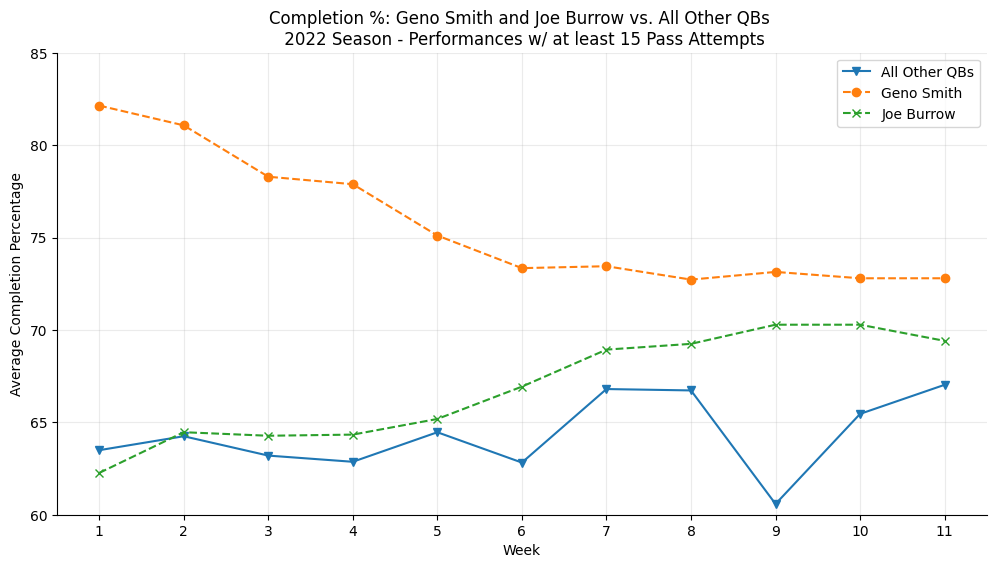

In [31]:
plt.figure(figsize=(12, 6))

plt.plot(
    'week', 
    'comp_pct', 
    data=by_week,
    marker='v', 
    label='All Other QBs')
plt.plot(
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
    geno_running_avg, # calculate cumulative average
    marker='o',
    linestyle='--',
    label='Geno Smith')

plt.plot(
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
    joe_running_avg, # calculate cumulative average
    marker='x',
    linestyle='--',
    label='Joe Burrow')

plt.xlabel('Week')
plt.ylabel('Average Completion Percentage')
plt.title('Completion %: Geno Smith and Joe Burrow vs. All Other QBs \n 2022 Season - Performances w/ at least 15 Pass Attempts')

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

plt.legend(loc="upper right")
plt.ylim(60,85)
plt.grid(alpha=0.25)
sns.despine()

plt.show()

Both players are slowly regressing to the mean, although Geno Smith is holding his relative outperformance. Burrow looks to be regressing towards the mean.